In [4]:
from helper import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math
from sklearn.feature_selection import SelectKBest

F:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [5]:
helper = Helper(enc=LABEL_ENCODING)
X_train, X_test, y_train, y_test = helper.getTrainTestNums()

In [6]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy:  0.72
F-Score:  0.7291654869518504


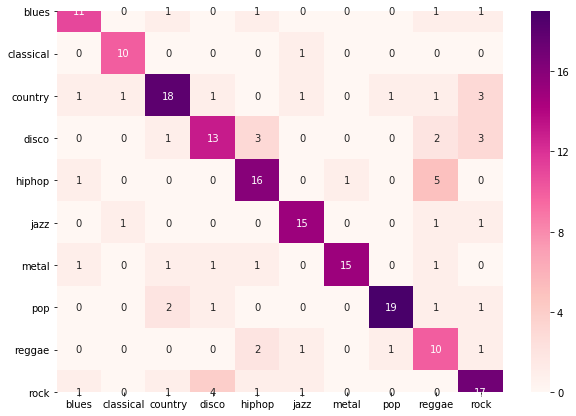

In [7]:
helper.evaluate(y_pred)

# Feature importance

In [33]:
features = pd.DataFrame(helper.dataset.columns.values[2:-1],columns=['Features'])

In [35]:
features['Importance'] = pow(math.e,lg.coef_[0])

In [58]:
features = features.sort_values(by=['Importance'],ascending=True)[:20]

<BarContainer object of 20 artists>

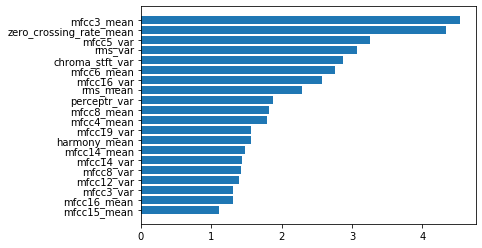

In [61]:
plt.barh(features['Features'].values,features['Importance'].values,height=0.8,)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'